### Inteligência Artificial & Otimização I
#### Algoritmo de Coloração de Grafos
##### Arthur Severo, Vitor Raposo, Victor Le Roy, Julio Cesar, Marco Túlio

Observações importantes:
* As cores serão representadas por números
* Podemos gerar grafos manualmente e automaticamente

In [10]:
from src.utils import print_population, generateGraph
from src.manual_graph import manual_graph_population_img1

import random
import copy
import numpy as np
import matplotlib.pyplot as plt

In [11]:
''' VARIAVEIS GLOBAIS PRE DEFINIDAS PARA EXECUCAO '''

# Definicoes basicas do algoritmo
MAX_GENERATIONS = 1000
POP_SIZE = 10
MUTATION_RATE = 0.1

# Definicoes das cores
MAX_NUM_COLORS = 3

# Definicoes do grafo
GRAPH_AUTO_GEN = False
AUTO_GEN_GRAPH_SIZE = 10

![image](./image/example1.png)
<p>Imagem 1</p>

In [12]:
def create_individual(graph):
    '''
        O individuo eh definido por um conjunto de vertices com cores aleatorias
    '''
    individual = graph
    for valor_vertice, vertice in individual.vertices.items():
        vertice.color = np.random.randint(1, MAX_NUM_COLORS) 
    return individual

In [13]:
def fitness(individual):
    '''
        Fitness vai ser a quantidade de arestas que tem a mesma cor,
        quanto menor o fitness, melhor a solucao
    '''
    fitness = 0
    for i in range(1, len(individual.vertices)+1):
        for j in range(i, len(individual.vertices)+1):
            if ((individual.vertices[i].color == individual.vertices[j].color) and (individual.vertices[j] in individual.vertices[i].adjacencias.values())):
                fitness += 1
    return fitness

In [14]:
def mutation (individual):  
    '''
        A mutacao gera um numero aleatorio, verifica se este numero eh menor que o valor
        da taxa de mutacao e, caso verdadeiro, altera a cor do vertice. Esse procedimento
        ocorre para todos os vertices dentro de um individuo
    '''
    for i in range(1, len(individual.vertices)+1):
        if np.random.rand() < MUTATION_RATE:
            individual.vertices[i].color = np.random.randint(1, MAX_NUM_COLORS)
    return individual

In [15]:
def crossover(graph, parent1, parent2):
    '''
        Crossover de ponto:
        Eh gerado um ponto aleatorio que sera considerado a posicao onde a populacao sera dividida
    '''
    position = random.randint(2, len(graph.vertices)-2)
    child1 = []
    child2 = []
    for i in range(position+1):
        child1.append(parent1[i])
        child2.append(parent2[i])
    for i in range(position+1, len(graph.vertices)):
        child1.append(parent2[i])
        child2.append(parent1[i])
    return child1, child2

In [16]:
def sort_population(population):
    return sorted(population, key=lambda individual: individual.fitness)

In [17]:
graph = generateGraph(GRAPH_AUTO_GEN, AUTO_GEN_GRAPH_SIZE, manual_graph_population_img1)
# graph.print_graph()

''' 
    * Criando a populacao inicial (populacao de grafos)
    * Cada individuo da populacao eh um grafo contendo uma cor para cada vertice
'''
pop_size = POP_SIZE
population = []
for i in range(pop_size):
    graph_copy = copy.deepcopy(graph)
    individual = create_individual(graph_copy)
    population.append(individual)
for i in population:
    i.setFitness(fitness, i)
population = sort_population(population)
print_population(population, False)


individuo 1:
Grafo:
Fitness: 5     Mapped Fitness: None

individuo 2:
Grafo:
Fitness: 6     Mapped Fitness: None

individuo 3:
Grafo:
Fitness: 6     Mapped Fitness: None

individuo 4:
Grafo:
Fitness: 7     Mapped Fitness: None

individuo 5:
Grafo:
Fitness: 7     Mapped Fitness: None

individuo 6:
Grafo:
Fitness: 8     Mapped Fitness: None

individuo 7:
Grafo:
Fitness: 8     Mapped Fitness: None

individuo 8:
Grafo:
Fitness: 8     Mapped Fitness: None

individuo 9:
Grafo:
Fitness: 8     Mapped Fitness: None

individuo 10:
Grafo:
Fitness: 11     Mapped Fitness: None



### Import Graph from Adj Matrix

csv:
	[['#658cda', '0', '1', '0', '0', '0'], ['#cac707', '0', '0', '1', '1', '0'], ['#62e1a3', '0', '1', '0', '0', '1'], ['#8b2cb0', '1', '0', '0', '0', '0'], ['#eca34a', '0', '1', '0', '0', '0']]
Nome: a     Valor: 0     Cor: #658cda     
Nome: b     Valor: 1     Cor: #cac707     
Nome: c     Valor: 2     Cor: #62e1a3     
Nome: d     Valor: 3     Cor: #8b2cb0     
Nome: e     Valor: 4     Cor: #eca34a     
add 0->1: 1
add 1->2: 1
add 1->3: 1
add 2->1: 1
add 2->4: 1
add 3->0: 1
add 4->1: 1
Grafo:
Fitness: None     Mapped Fitness: None
    vertice: 
        Nome: a     Valor: 0     Cor: #658cda     
     vizinhos: 
        Nome: b     Valor: 1     Cor: #cac707     
        Nome: d     Valor: 3     Cor: #8b2cb0     

    vertice: 
        Nome: b     Valor: 1     Cor: #cac707     
     vizinhos: 
        Nome: a     Valor: 0     Cor: #658cda     
        Nome: c     Valor: 2     Cor: #62e1a3     
        Nome: d     Valor: 3     Cor: #8b2cb0     
        Nome: e     Valor: 4     Cor: #e

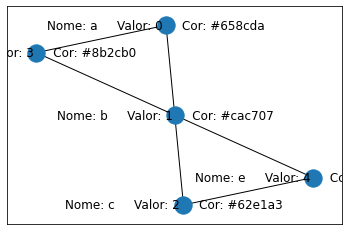

In [18]:
from src.auto_graph import auto_graph_readfile

path = "./data/adjmtx1.csv"
g = auto_graph_readfile(path)
g.print_graph()
g.visualize()